In [1]:
# Devesh Bhogre
# PB47
# LAB-7 Clustering

### Clustering Algorithms

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
X = np.array([
              [5,3],[10,15],[15,12],
              [24,10], [30,45], [85,70],
              [71,80], [60,78], [55,52], [80,91]
             ])

In [4]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [5]:
print(kmeans.cluster_centers_)

[[16.8 17. ]
 [70.2 74.2]]


In [6]:
print(kmeans.labels_)
kmeans.predict([[0,0], [4,4]])

[0 0 0 0 0 1 1 1 1 1]


array([0, 0])

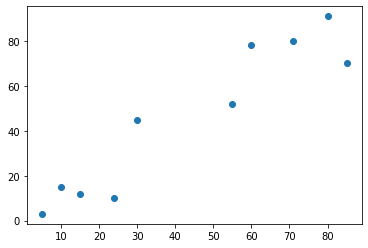

In [7]:
plt.scatter(X[:,0], X[:,1], label='True Position')

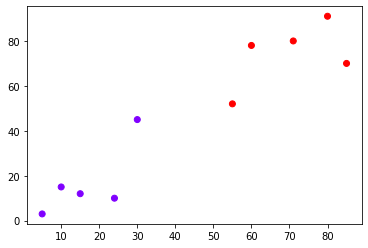

In [8]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')

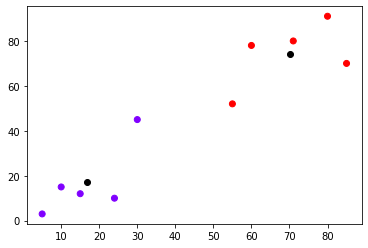

In [9]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')

In [10]:
#Agglomerative Clustering

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc

In [12]:
# importing data
x = pd.read_csv("C:\\Users\\Devesh Bhogre\\Desktop\\Programs\\Python\\classes\\IMLA\\LAB-7 Clustering\\credit.csv")
x.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [13]:
# cleaning data
x = x.drop('CUST_ID', axis=1)
x.fillna(method='ffill', inplace=True)

In [14]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)

In [15]:
# PCA Dimensionality Reduction

pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normalized)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2']

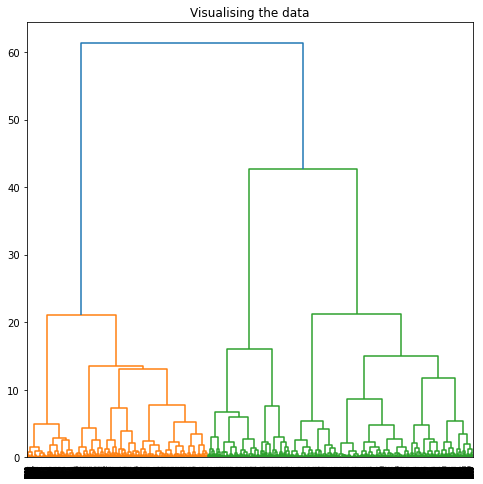

In [16]:
plt.figure(figsize = (8,8))
plt.title('Visualising the data')
dendrogram = shc.dendrogram((shc.linkage(x_principal, method='ward')))

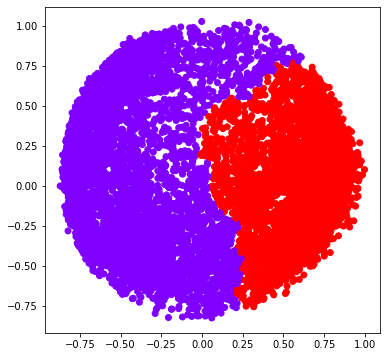

In [17]:
ac2 = AgglomerativeClustering(n_clusters = 2)

plt.figure(figsize=(6,6))
plt.scatter(x_principal['P1'], x_principal['P2'],
            c=ac2.fit_predict(x_principal), cmap='rainbow'
            )

In [18]:
# Agglomertive clustering on aggl.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [19]:
x = pd.read_csv("C:\\Users\\Devesh Bhogre\\Desktop\\Programs\\Python\\classes\\IMLA\\LAB-7 Clustering\\aggl.csv")
x = x.iloc[:,[3,4]].values

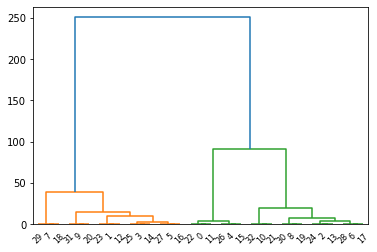

In [20]:
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))

In [21]:
model = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage='ward')
model.fit(x)
labels = model.labels_

In [22]:
labels

array([2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4, 2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4,
       2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4], dtype=int64)

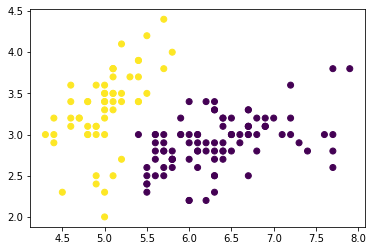

In [23]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering

iris = datasets.load_iris()
x = iris.data[:,:2]
ac = AgglomerativeClustering(n_clusters = 2)
y_pred = ac.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c=y_pred )#, linkage='average')

In [24]:
#DBSCAN Clusturing

In [25]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize

x = pd.read_csv("C:\\Users\\Devesh Bhogre\\Desktop\\Programs\\Python\\classes\\IMLA\\LAB-7 Clustering\\credit.csv")

# cleaning data
x = x.drop('CUST_ID', axis=1)
x.fillna(method='ffill', inplace=True)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_normalized = normalize(x_scaled)
x_normalized = pd.DataFrame(x_normalized)

# PCA Dimensionality Reduction
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normalized)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['P1', 'P2']

db = DBSCAN(eps = 10, min_samples=3)
db.fit(x_normalized)
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
labels[:]

array([2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4, 2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4,
       2, 0, 1, 0, 2, 0, 1, 3, 1, 0, 4], dtype=int64)

In [27]:
set(labels)

{0, 1, 2, 3, 4}